In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pims

import dask
import dask.array as da
import tifffile as tf
from nd2reader import ND2Reader
# from pims import ND2_Reader as ND2Reader
# import aicsimageio.vendor.omexml as ome
import glob
import time, sys
sys.path.insert(0,'/home/jmamede/scripts/notebooks/libraries/')
from deco_libraries import Concat_OMEXML,update_progress, pimsmeta2OMEXML, Nd2meta2OMEXML, observer, init_RL_algo, deconv, depth_divide

In [2]:
filelist = glob.glob("/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2")
filelist.sort()

In [66]:
# filelist
# filelist.pop()
# filelist.reverse()
filelist.reverse()

In [3]:
xml = Concat_OMEXML(filelist.copy(), project = True, verbose = True)

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


Time total: /home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
Write PlaneTable:  0 0 0 0
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
0
No position Z
No position X
No position Y
Write PlaneTable:  0 0 1 1
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
1
No position Z
No position X
No position Y
Write PlaneTable:  0 0 2 2
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
2
No position Z
No position X
No position Y
Write PlaneTable:  1 0 0 3
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
3
No position Z
No position X
No 

/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
38
No position Z
No position X
No position Y
Write PlaneTable:  13 0 0 39
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
39
No position Z
No position X
No position Y
Write PlaneTable:  13 0 1 40
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
40
No position Z
No position X
No position Y
Write PlaneTable:  13 0 2 41
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
41
No position Z
No position X
No position Y
Write PlaneTable:  14 0 0 42
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy

/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
76
No position Z
No position X
No position Y
Write PlaneTable:  25 0 2 77
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
77
No position Z
No position X
No position Y
Write PlaneTable:  26 0 0 78
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
78
No position Z
No position X
No position Y
Write PlaneTable:  26 0 1 79
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
79
No position Z
No position X
No position Y
Write PlaneTable:  26 0 2 80
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy

/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
114
No position Z
No position X
No position Y
Write PlaneTable:  38 0 1 115
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
115
No position Z
No position X
No position Y
Write PlaneTable:  38 0 2 116
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
116
No position Z
No position X
No position Y
Write PlaneTable:  39 0 0 117
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
117
No position Z
No position X
No position Y
Write PlaneTable:  39 0 1 118
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richard

/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
152
No position Z
No position X
No position Y
Write PlaneTable:  51 0 0 153
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
153
No position Z
No position X
No position Y
Write PlaneTable:  51 0 1 154
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
154
No position Z
No position X
No position Y
Write PlaneTable:  51 0 2 155
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
155
No position Z
No position X
No position Y
Write PlaneTable:  52 0 0 156
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richard

/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
190
No position Z
No position X
No position Y
Write PlaneTable:  63 0 2 191
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
191
No position Z
No position X
No position Y
Write PlaneTable:  64 0 0 192
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
192
No position Z
No position X
No position Y
Write PlaneTable:  64 0 1 193
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
193
No position Z
No position X
No position Y
Write PlaneTable:  64 0 2 194
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richard

No position Z
No position X
No position Y
Write PlaneTable:  76 0 0 228
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
228
No position Z
No position X
No position Y
Write PlaneTable:  76 0 1 229
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
229
No position Z
No position X
No position Y
Write PlaneTable:  76 0 2 230
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
230
No position Z
No position X
No position Y
Write PlaneTable:  77 0 0 231
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
231
No position Z
No position X
No position Y
Write PlaneTable:  77 0 1 232
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin25

/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
266
No position Z
No position X
No position Y
Write PlaneTable:  89 0 0 267
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
267
No position Z
No position X
No position Y
Write PlaneTable:  89 0 1 268
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
268
No position Z
No position X
No position Y
Write PlaneTable:  89 0 2 269
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2
269
No position Z
No position X
No position Y
Write PlaneTable:  90 0 0 270
/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richard

In [5]:
# filelist = glob.glob("/home/jmamede/Data/test/Concat/*_v01_*ome.tiff")
xml.to_xml()

'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" UUID="urn:uuid:0b7107c5-3a9d-4cc9-b84e-60fcaed8975f" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd">\n  <Image ID="Image:0" Name="f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2">\n    <AcquisitionDate>2021-05-25T00:39:32.238523</AcquisitionDate>\n    <Pixels BigEndian="true" DimensionOrder="XYCZT" ID="Pixels:0" PhysicalSizeX="0.216666666666667" PhysicalSizeY="0.216666666666667" SizeC="3" SizeT="101" SizeX="1024" SizeY="1024" SizeZ="1" Type="uint16">\n<Channel Color="620691711" ID="Channel:0:0" Name="GFP" SamplesPerPixel="1">\n        <LightPath />\n      </Channel>\n    <Channel Color="-16776961" ID="19984c18-09f4-4a8b-9508-f3152831f7d3" Name="mRuby3" SamplesPerPixel="1" /><Chan

In [9]:
for number in [15]:
    dire= '/run/media/jmamede/Joao/'
    fname = dire+'f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy'+str(
            number).zfill(2)+'_PRJ.ome.tiff'
    with tf.TiffWriter(fname, bigtiff=True ,
                               imagej=False) as tif:
        filelist = filelist = glob.glob(
            "/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2")
#         filelist.sort()
#         filelist.reverse()
#         filelist.pop()
        first = True
        for ficheiro in filelist:
            print(ficheiro)
            reader = pims.bioformats.BioformatsReader(ficheiro,java_memory='1024m')
            reader.bundle_axes = 'cyx'
            for time in range(reader.sizes['t']):
                if time >= 64 and time <68:
                    I = np.stack((reader[time][2],reader[time][0],reader[time][1]))
                elif time == 68:
                    I = np.stack((reader[time][2],reader[time][1],reader[time][0]))
                else:
                    I = reader[time]
                if first:
                    tif.save(I.astype(np.uint16)
                        , compress='ZLIB'
                        , description = xml.to_xml()
                        , photometric='minisblack'
                        #, datetime= True
                        , metadata= None
                        , contiguous=False
                        )
                    first = False
                else: 
                    tif.save(I.astype(np.uint16)
                        , compress='ZLIB'
        #                 , description = xml.to_xml()
                        , photometric='minisblack'
                        #, datetime= True
                        , metadata= None
                        , contiguous=False
                        )

/home/jmamede/Data/CaRuby3/f2_igfp3car3_vitc_rutin250_pbn_nh4cl_pump1stframe_xy15 - Deconvolved 100 iterations, Type Richardson-Lucy-MaxIP.nd2


In [21]:
reader = pims.bioformats.BioformatsReader('/home/jmamede/Data/test/Concat/test.ome.tiff',java_memory='1024m')

In [22]:
reader


<FramesSequenceND>
Axes: 4
Axis 'x' size: 2048
Axis 'y' size: 2044
Axis 'c' size: 3
Axis 't' size: 116
Pixel Datatype: <u2

Frame([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)
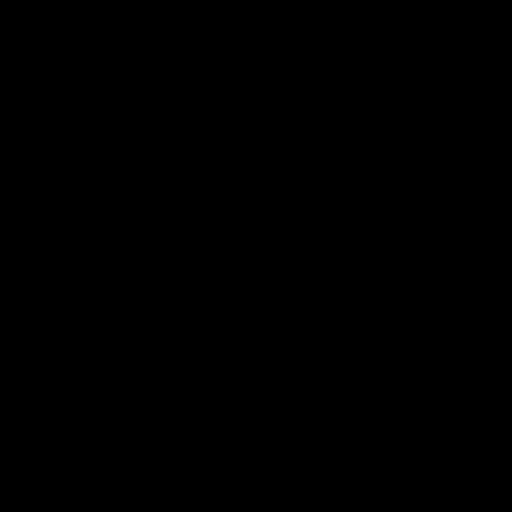

In [57]:
reader.bundle_axes = 'cyx'
reader[25]